**1. Import Required Packages**

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# Display all columns in a dataset
pd.set_option('display.max_columns',None)

**2. Load Data**

In [3]:
sector_data = pd.read_csv('/Users/xonkar/Desktop/Data_Projects/Options/Technology/TechFlow0109.csv')
sector_data

,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price
0,2023-01-09,3:59:57 PM,MSFT,SWEEP,200,6.750,A,CALL,235.0,227.1400,135000,2023-02-17,WHITE,0.33,39,F,STOCK,Information Technology,F,F,1676733000000,16193,2023-01-10,2023-01-12,2023-01-16,228.850006,238.509995,240.350006
1,2023-01-09,3:59:44 PM,BABA,BLOCK,304,3.900,B,CALL,121.0,110.8376,118560,2023-02-10,YELLOW,0.58,32,F,STOCK,Information Technology,F,F,291151000000,23,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002
2,2023-01-09,3:58:22 PM,NVDA,BLOCK,250,8.460,B,CALL,150.0,156.1900,211500,2023-01-13,MAGENTA,0.74,4,F,STOCK,Information Technology,F,T,365531000000,3918,2023-01-10,2023-01-12,2023-01-16,159.089996,165.110001,177.020004
3,2023-01-09,3:58:16 PM,BABA,SWEEP,500,14.850,B,CALL,100.0,110.9199,742522,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002
4,2023-01-09,3:58:05 PM,BABA,SWEEP,250,14.878,B,CALL,100.0,110.9200,371961,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2023-01-09,9:30:02 AM,CRM,BLOCK,1000,21.900,B,CALL,150.0,143.5300,2190000,2024-01-19,YELLOW,0.39,375,F,STOCK,Information Technology,F,F,140510000000,755,2023-01-10,2023-01-12,2023-01-16,147.440002,149.600006,148.470001
1299,2023-01-09,9:30:00 AM,AAPL,ML/,999,6.152,B,CALL,145.0,130.7000,614555,2023-06-16,WHITE,0.32,157,F,STOCK,Information Technology,F,F,2062010000000,13919,2023-01-10,2023-01-12,2023-01-16,130.729996,133.410004,135.940002
1300,2023-01-09,9:30:00 AM,AAPL,ML/,999,10.248,BB,PUT,130.0,130.7000,1023805,2023-06-16,WHITE,0.33,157,F,STOCK,Information Technology,F,F,2062010000000,71667,2023-01-10,2023-01-12,2023-01-16,130.729996,133.410004,135.940002
1301,2023-01-09,9:30:00 AM,AMD,ML/,998,4.780,A,PUT,70.0,66.0000,477041,2023-01-20,WHITE,0.49,11,F,STOCK,Information Technology,F,F,103126000000,61125,2023-01-10,2023-01-12,2023-01-16,68.050003,70.800003,71.589996


**4. Feature Engineering: Target Vairable**

In [4]:
sector_data['1D Performance'] = ((sector_data['1D Price'] - sector_data['Spot']) / sector_data['Spot']) * 100
sector_data['3D Performance'] = ((sector_data['3D Price'] - sector_data['Spot']) / sector_data['Spot']) * 100
sector_data['5D Performance'] = ((sector_data['5D Price'] - sector_data['Spot']) / sector_data['Spot']) * 100


In [5]:
sector_data['Distance'] = ((sector_data['Strike'] - sector_data['Spot']) / sector_data['Spot']) * 100

In [6]:
sector_data 

,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance
0,2023-01-09,3:59:57 PM,MSFT,SWEEP,200,6.750,A,CALL,235.0,227.1400,135000,2023-02-17,WHITE,0.33,39,F,STOCK,Information Technology,F,F,1676733000000,16193,2023-01-10,2023-01-12,2023-01-16,228.850006,238.509995,240.350006,0.752842,5.005721,5.815799,3.460421
1,2023-01-09,3:59:44 PM,BABA,BLOCK,304,3.900,B,CALL,121.0,110.8376,118560,2023-02-10,YELLOW,0.58,32,F,STOCK,Information Technology,F,F,291151000000,23,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002,3.647135,2.086297,3.926828,9.168730
2,2023-01-09,3:58:22 PM,NVDA,BLOCK,250,8.460,B,CALL,150.0,156.1900,211500,2023-01-13,MAGENTA,0.74,4,F,STOCK,Information Technology,F,T,365531000000,3918,2023-01-10,2023-01-12,2023-01-16,159.089996,165.110001,177.020004,1.856711,5.710993,13.336324,-3.963122
3,2023-01-09,3:58:16 PM,BABA,SWEEP,500,14.850,B,CALL,100.0,110.9199,742522,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002,3.570232,2.010551,3.849717,-9.844852
4,2023-01-09,3:58:05 PM,BABA,SWEEP,250,14.878,B,CALL,100.0,110.9200,371961,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002,3.570138,2.010459,3.849624,-9.844933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2023-01-09,9:30:02 AM,CRM,BLOCK,1000,21.900,B,CALL,150.0,143.5300,2190000,2024-01-19,YELLOW,0.39,375,F,STOCK,Information Technology,F,F,140510000000,755,2023-01-10,2023-01-12,2023-01-16,147.440002,149.600006,148.470001,2.724171,4.229085,3.441790,4.507768
1299,2023-01-09,9:30:00 AM,AAPL,ML/,999,6.152,B,CALL,145.0,130.7000,614555,2023-06-16,WHITE,0.32,157,F,STOCK,Information Technology,F,F,2062010000000,13919,2023-01-10,2023-01-12,2023-01-16,130.729996,133.410004,135.940002,0.022950,2.073453,4.009183,10.941086
1300,2023-01-09,9:30:00 AM,AAPL,ML/,999,10.248,BB,PUT,130.0,130.7000,1023805,2023-06-16,WHITE,0.33,157,F,STOCK,Information Technology,F,F,2062010000000,71667,2023-01-10,2023-01-12,2023-01-16,130.729996,133.410004,135.940002,0.022950,2.073453,4.009183,-0.535578
1301,2023-01-09,9:30:00 AM,AMD,ML/,998,4.780,A,PUT,70.0,66.0000,477041,2023-01-20,WHITE,0.49,11,F,STOCK,Information Technology,F,F,103126000000,61125,2023-01-10,2023-01-12,2023-01-16,68.050003,70.800003,71.589996,3.106065,7.272732,8.469691,6.060606


In [7]:
# Define conditions
conditions = [
    (sector_data['CallPut'] == 'CALL') & (sector_data['Spot'] < sector_data['Strike']) & (sector_data['Distance'] > 1),  # OTM CALL
    (sector_data['CallPut'] == 'PUT') & (sector_data['Spot'] > sector_data['Strike']) & (sector_data['Distance'] < -1),  # OTM PUT
    (np.abs(sector_data['Distance']) <= 1),  # ATM
    (sector_data['CallPut'] == 'CALL') & (sector_data['Spot'] > sector_data['Strike']) & (sector_data['Distance'] < 1),  # ITM CALL
    (sector_data['CallPut'] == 'PUT') & (sector_data['Spot'] < sector_data['Strike']) & (sector_data['Distance'] > -1)   # ITM PUT
]

# Define corresponding values
values = ['OTM', 'OTM', 'ATM', 'ITM', 'ITM']

# Create 'ITM_OTM_ATM' column based on conditions
sector_data['Money'] = np.select(conditions, values, default='Unknown')


In [8]:
sector_data.groupby('Money').size()

Money
ATM    155
ITM    659
OTM    489
dtype: int64

In [9]:
# Get the list of column names in the DataFrame
columns = sector_data.columns.tolist()

# Remove 'Money' column from its current position
columns.remove('Money')

# Insert 'Money' column next to 'CallPut' column
new_index = columns.index('CallPut') 
columns.insert(new_index, 'Money')

# Reassign the columns of the DataFrame in the new order
sector_data = sector_data[columns]


In [10]:
sector_data

,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance
0,2023-01-09,3:59:57 PM,MSFT,SWEEP,200,6.750,A,OTM,CALL,235.0,227.1400,135000,2023-02-17,WHITE,0.33,39,F,STOCK,Information Technology,F,F,1676733000000,16193,2023-01-10,2023-01-12,2023-01-16,228.850006,238.509995,240.350006,0.752842,5.005721,5.815799,3.460421
1,2023-01-09,3:59:44 PM,BABA,BLOCK,304,3.900,B,OTM,CALL,121.0,110.8376,118560,2023-02-10,YELLOW,0.58,32,F,STOCK,Information Technology,F,F,291151000000,23,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002,3.647135,2.086297,3.926828,9.168730
2,2023-01-09,3:58:22 PM,NVDA,BLOCK,250,8.460,B,ITM,CALL,150.0,156.1900,211500,2023-01-13,MAGENTA,0.74,4,F,STOCK,Information Technology,F,T,365531000000,3918,2023-01-10,2023-01-12,2023-01-16,159.089996,165.110001,177.020004,1.856711,5.710993,13.336324,-3.963122
3,2023-01-09,3:58:16 PM,BABA,SWEEP,500,14.850,B,ITM,CALL,100.0,110.9199,742522,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002,3.570232,2.010551,3.849717,-9.844852
4,2023-01-09,3:58:05 PM,BABA,SWEEP,250,14.878,B,ITM,CALL,100.0,110.9200,371961,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002,3.570138,2.010459,3.849624,-9.844933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2023-01-09,9:30:02 AM,CRM,BLOCK,1000,21.900,B,OTM,CALL,150.0,143.5300,2190000,2024-01-19,YELLOW,0.39,375,F,STOCK,Information Technology,F,F,140510000000,755,2023-01-10,2023-01-12,2023-01-16,147.440002,149.600006,148.470001,2.724171,4.229085,3.441790,4.507768
1299,2023-01-09,9:30:00 AM,AAPL,ML/,999,6.152,B,OTM,CALL,145.0,130.7000,614555,2023-06-16,WHITE,0.32,157,F,STOCK,Information Technology,F,F,2062010000000,13919,2023-01-10,2023-01-12,2023-01-16,130.729996,133.410004,135.940002,0.022950,2.073453,4.009183,10.941086
1300,2023-01-09,9:30:00 AM,AAPL,ML/,999,10.248,BB,ATM,PUT,130.0,130.7000,1023805,2023-06-16,WHITE,0.33,157,F,STOCK,Information Technology,F,F,2062010000000,71667,2023-01-10,2023-01-12,2023-01-16,130.729996,133.410004,135.940002,0.022950,2.073453,4.009183,-0.535578
1301,2023-01-09,9:30:00 AM,AMD,ML/,998,4.780,A,ITM,PUT,70.0,66.0000,477041,2023-01-20,WHITE,0.49,11,F,STOCK,Information Technology,F,F,103126000000,61125,2023-01-10,2023-01-12,2023-01-16,68.050003,70.800003,71.589996,3.106065,7.272732,8.469691,6.060606


In [11]:
# List of columns you want to round
columns_to_round = ['Price','Spot','Distance','1D Price','3D Price','5D Price', '1D Performance','3D Performance','5D Performance']

# Apply the round function to selected columns
sector_data[columns_to_round] = sector_data[columns_to_round].apply(lambda x: round(x, 2))

In [12]:
sector_data

,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance
0,2023-01-09,3:59:57 PM,MSFT,SWEEP,200,6.75,A,OTM,CALL,235.0,227.14,135000,2023-02-17,WHITE,0.33,39,F,STOCK,Information Technology,F,F,1676733000000,16193,2023-01-10,2023-01-12,2023-01-16,228.85,238.51,240.35,0.75,5.01,5.82,3.46
1,2023-01-09,3:59:44 PM,BABA,BLOCK,304,3.90,B,OTM,CALL,121.0,110.84,118560,2023-02-10,YELLOW,0.58,32,F,STOCK,Information Technology,F,F,291151000000,23,2023-01-10,2023-01-12,2023-01-16,114.88,113.15,115.19,3.65,2.09,3.93,9.17
2,2023-01-09,3:58:22 PM,NVDA,BLOCK,250,8.46,B,ITM,CALL,150.0,156.19,211500,2023-01-13,MAGENTA,0.74,4,F,STOCK,Information Technology,F,T,365531000000,3918,2023-01-10,2023-01-12,2023-01-16,159.09,165.11,177.02,1.86,5.71,13.34,-3.96
3,2023-01-09,3:58:16 PM,BABA,SWEEP,500,14.85,B,ITM,CALL,100.0,110.92,742522,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.88,113.15,115.19,3.57,2.01,3.85,-9.84
4,2023-01-09,3:58:05 PM,BABA,SWEEP,250,14.88,B,ITM,CALL,100.0,110.92,371961,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.88,113.15,115.19,3.57,2.01,3.85,-9.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2023-01-09,9:30:02 AM,CRM,BLOCK,1000,21.90,B,OTM,CALL,150.0,143.53,2190000,2024-01-19,YELLOW,0.39,375,F,STOCK,Information Technology,F,F,140510000000,755,2023-01-10,2023-01-12,2023-01-16,147.44,149.60,148.47,2.72,4.23,3.44,4.51
1299,2023-01-09,9:30:00 AM,AAPL,ML/,999,6.15,B,OTM,CALL,145.0,130.70,614555,2023-06-16,WHITE,0.32,157,F,STOCK,Information Technology,F,F,2062010000000,13919,2023-01-10,2023-01-12,2023-01-16,130.73,133.41,135.94,0.02,2.07,4.01,10.94
1300,2023-01-09,9:30:00 AM,AAPL,ML/,999,10.25,BB,ATM,PUT,130.0,130.70,1023805,2023-06-16,WHITE,0.33,157,F,STOCK,Information Technology,F,F,2062010000000,71667,2023-01-10,2023-01-12,2023-01-16,130.73,133.41,135.94,0.02,2.07,4.01,-0.54
1301,2023-01-09,9:30:00 AM,AMD,ML/,998,4.78,A,ITM,PUT,70.0,66.00,477041,2023-01-20,WHITE,0.49,11,F,STOCK,Information Technology,F,F,103126000000,61125,2023-01-10,2023-01-12,2023-01-16,68.05,70.80,71.59,3.11,7.27,8.47,6.06


In [13]:
sector_data.describe()

,Volume,Price,Strike,Spot,Premium,ImpliedVolatility,Dte,MktCap,OI,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance
count,1303.000000,1303.000000,1303.000000,1303.000000,1.303000e+03,1303.000000,1303.000000,1.303000e+03,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,831.721412,23.087475,146.280123,129.300384,1.354432e+06,0.591358,87.839601,6.000706e+11,7317.810437,129.743170,133.201443,135.978358,0.588127,2.928281,5.270967,18.490629
std,1516.502288,34.497039,101.125413,91.405175,2.848694e+06,0.495703,144.422600,7.873026e+11,12745.999311,90.893624,95.198603,96.410166,2.715707,3.990783,6.079894,49.565312
min,80.000000,0.200000,2.500000,5.060000,1.000000e+05,0.000000,4.000000,0.000000e+00,0.000000,5.750000,6.160000,6.180000,-5.000000,-15.170000,-19.790000,-90.770000
25%,206.000000,4.455000,95.000000,69.795000,1.727360e+05,0.350000,11.000000,4.648400e+10,614.500000,70.030000,71.800000,75.100000,-0.960000,0.940000,2.605000,-2.180000
50%,398.000000,9.750000,130.000000,122.400000,3.512340e+05,0.520000,39.000000,2.458990e+11,2657.000000,126.930000,131.630000,130.620000,0.010000,2.430000,4.110000,2.180000
75%,845.500000,28.240000,165.000000,150.860000,1.175628e+06,0.665000,101.000000,1.036536e+12,8919.500000,154.325000,156.750000,159.800000,1.700000,4.130000,7.120000,25.895000
max,22046.000000,303.400000,925.000000,917.800000,3.112090e+07,4.910000,892.000000,2.062010e+12,100711.000000,915.780000,1024.310000,1070.000000,23.300000,38.860000,65.330000,532.910000


In [14]:
# Create a pivot table
pivot_table_df = pd.pivot_table(sector_data, 
                                values='Premium', 
                                index='Sector', 
                                columns=['CallPut', 'Side'], 
                                aggfunc='sum', 
                                fill_value=0)

# Calculate the sum of all values in the pivot table
total_sum = pivot_table_df.values.sum()

# Normalize the pivot table to percentages
pivot_table_df = (pivot_table_df / total_sum) * 100
pivot_table_df = pivot_table_df.round()

# Display the normalized pivot table
pivot_table_df


CallPut                CALL                       PUT                     
Side                      A   AA    B   BB    N     A   AA     B   BB    N
Sector                                                                    
Information Technology  6.0  0.0  6.0  1.0  1.0  35.0  0.0  47.0  0.0  5.0

In [15]:
# Group by 'CallPut' and calculate the sum of 'Premium'
callput_ratio = sector_data.groupby(['CallPut'])['Premium'].sum().reset_index()

# Create a bar chart for CallPut ratio
fig1 = px.bar(callput_ratio, x='CallPut', y='Premium', title='Call-Put Ratio')

# Group by 'CallPut' and calculate the average of '5D Performance'
avg_5d_performance = sector_data.groupby(['CallPut'])['5D Performance'].mean().reset_index()

# Create a bar chart for average '5D Performance' by CallPut
fig2 = px.bar(avg_5d_performance, x='CallPut', y='5D Performance', title='Average 5D Performance by CallPut')

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Call-Put Ratio', 'Average 5D Performance by CallPut'))

# Add bar chart to the first subplot
fig.add_trace(fig1.data[0], row=1, col=1)

# Add bar chart to the second subplot
fig.add_trace(fig2.data[0], row=1, col=2)

# Update layout
fig.update_layout(title='CallPut Analysis')

# Show the plot
fig.show()


In [16]:
# Group by 'Side' and calculate the sum of 'Premium'
side_ratio = sector_data.groupby(['Side'])['Premium'].sum().reset_index()

# Create a bar chart for Side ratio
fig1 = px.bar(side_ratio, x='Side', y='Premium', title='Call-Put Ratio')

# Group by 'Side' and calculate the average of '5D Performance'
avg_5d_performance = sector_data.groupby(['Side'])['5D Performance'].mean().reset_index()

# Create a bar chart for average '5D Performance' by Side
fig2 = px.bar(avg_5d_performance, x='Side', y='5D Performance', title='Average 5D Performance by Side')

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Side by Premium', 'Average 5D Performance by Side'))

# Add bar chart to the first subplot
fig.add_trace(fig1.data[0], row=1, col=1)

# Add bar chart to the second subplot
fig.add_trace(fig2.data[0], row=1, col=2)

# Update layout
fig.update_layout(title='Side Analysis')

# Show the plot
fig.show()


In [17]:
# import plotly.express as px

# # Group by 'Side' and 'CallPut', then calculate the mean of 'Dte'
# mean_dte_by_side = sector_data.groupby(['Side', 'CallPut'])['Dte'].mean().reset_index()

# # Create a bar chart using Plotly Express with facet_col='CallPut'
# fig = px.bar(mean_dte_by_side, x='Side', y='Dte', color='CallPut', 
#              title='Mean Dte by Side and CallPut', 
#              color_discrete_map={'CALL': 'green', 'PUT': 'red'},
#              facet_col='CallPut', 
#              labels={'CallPut': 'Type'})

# # Show the plot
# fig.show()


In [18]:

# Group by 'CallPut', 'Money', and 'Side' and calculate the mean of '5D Performance'
mean_performance_by_group = sector_data.groupby(['CallPut', 'Money', 'Side'])['5D Performance'].mean().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(mean_performance_by_group, x='Side', y='5D Performance', color='Money', barmode='group',
             facet_row='CallPut', title='Mean 5D Performance by CallPut, Money, and Side')

# Show the plot
fig.show()


In [19]:

# Group by 'CallPut', 'Money', and 'Side' and calculate the mean of '5D Performance'
mean_performance_by_group = sector_data.groupby(['CallPut', 'Money', 'Type'])['5D Performance'].mean().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(mean_performance_by_group, x='Type', y='5D Performance', color='Money', barmode='group',
             facet_row='CallPut', title='Mean 5D Performance by CallPut, Money, and Side')

# Show the plot
fig.show()


In [20]:
sector_data['Symbol'].unique()


array(['MSFT', 'BABA', 'NVDA', 'AVGO', 'AAPL', 'QCOM', 'OLED', 'UMC',
       'BILI', 'UBER', 'MSTR', 'AMD', 'T', 'SQ', 'COIN', 'AMAT', 'INTC',
       'PANW', 'ABNB', 'ROK', 'ASML', 'MU', 'BILL', 'ADBE', 'CRM', 'CRWD',
       'ETSY', 'NOW', 'SNOW', 'SWKS', 'TSM', 'AMKR', 'VZ', 'DDOG', 'RAMP',
       'NET', 'SNAP', 'WB', 'SPLK', 'ZS', 'DOCU', 'ZM', 'SHOP', 'OKTA',
       'IBM', 'ENPH', 'ADP', 'WK', 'FTNT', 'CSIQ', 'WDAY', 'HOOD', 'AMBA',
       'STX', 'TMUS', 'TTWO', 'KLAC', 'MDB', 'FSLR', 'ENV', 'MBLY',
       'APPS', 'ORCL', 'TEAM', 'CSCO', 'MARA', 'MELI', 'DASH', 'PI', 'EA',
       'TTD', 'TWLO', 'TXN', 'U', 'BIDU', 'FTDR', 'CARS', 'AEHR', 'MRVL',
       'ACN', 'WOLF', 'VNET', 'IRM', 'CLFD'], dtype=object)

In [21]:
sector_data['Symbol'].nunique()



84

In [22]:
# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [23]:
# Inspect some rows containing duplicates as needed
sector_data[sector_data.duplicated()].head()

,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance


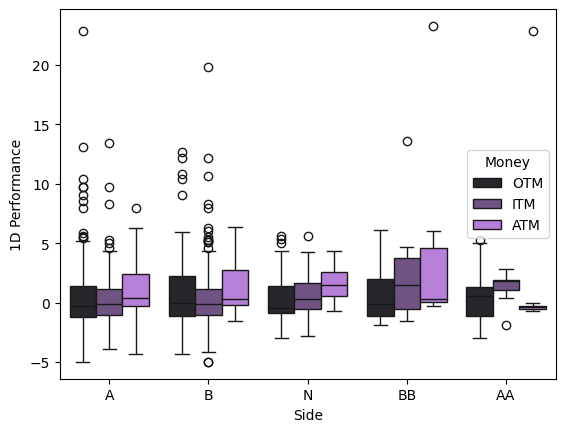

In [24]:
ax = sns.boxplot(x="Side", y="1D Performance", data=sector_data, color="#B971E7", hue = 'Money')

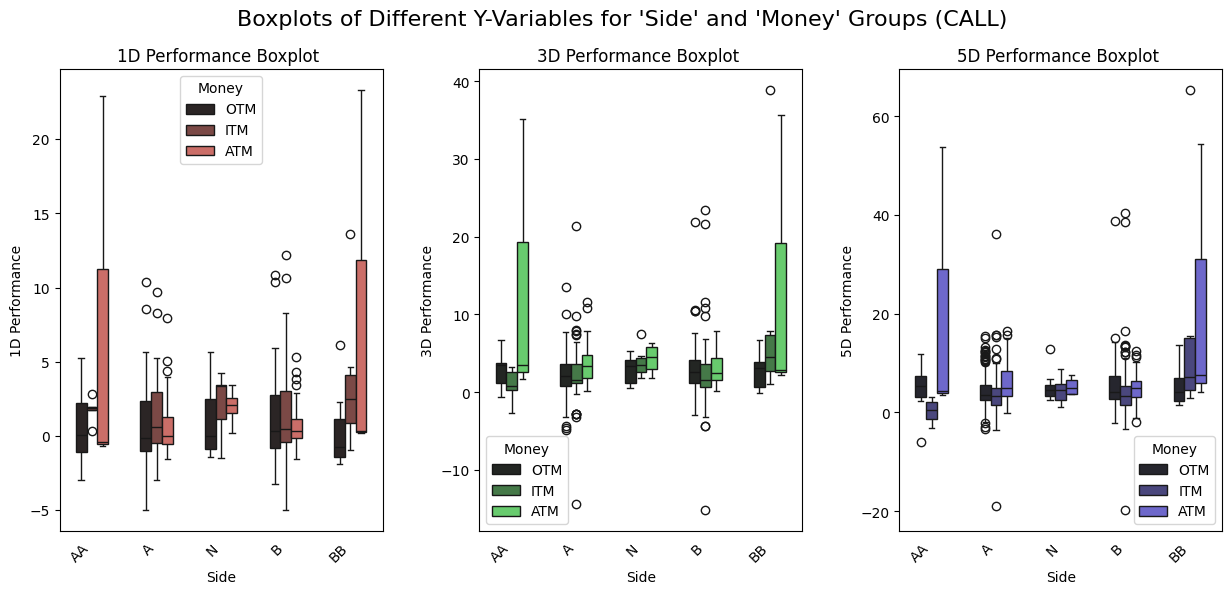

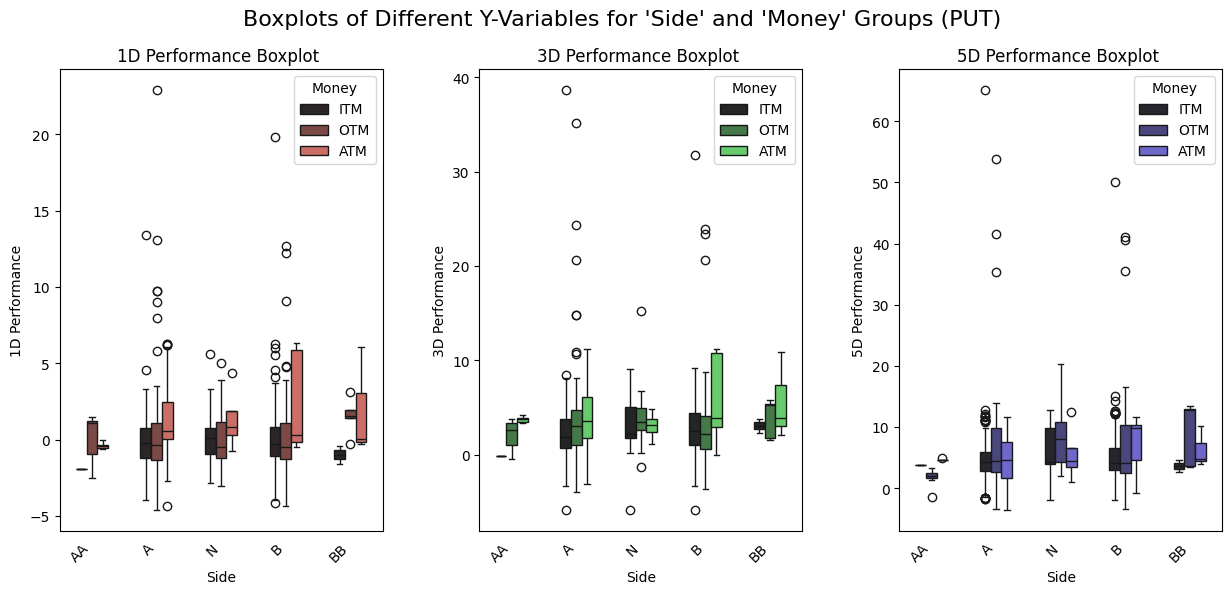

In [25]:
# Assuming your DataFrame is called `sector_data`
# Specify the y-variables you want to plot (replace with actual column names)
y_vars = ["1D Performance", "3D Performance", "5D Performance"]

# Prepare a list of colors for aesthetics and clarity
colors = sns.color_palette("hls", len(y_vars))

# Define your desired order of sides
ordered_sides = ["AA", "A", "N", "B", "BB"]

# Create separate figures and subplots for CALL and PUT
for callput in ["CALL", "PUT"]:
    fig, axes = plt.subplots(1, len(y_vars), figsize=(15, 6))  # Adjust figsize as needed

    # Iterate through each subplot and y-variable, creating boxplots
    for i, y_var in enumerate(y_vars):
        filtered_data = sector_data[(sector_data["Side"].isin(ordered_sides)) & (sector_data["CallPut"] == callput)]

        sns.boxplot(
            x="Side",
            y=y_var,
            hue="Money",
            data=filtered_data,
            order=ordered_sides,  # Specify order
            color=colors[i],
            width=0.5,
            ax=axes[i]
        )

        # Rotate x-axis labels for better readability if needed
        plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45, ha="right")

        # Set titles and adjust spacing (customize titles as needed)
        axes[i].set_title(f"{y_var} Boxplot ")
        axes[i].tick_params(bottom=False)  # Remove unneeded ticks

    # Adjust overall layout and spacing
    plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Adjust spacing as desired
    plt.suptitle(f"Boxplots of Different Y-Variables for 'Side' and 'Money' Groups ({callput})", fontsize=16)  # Add overall title
    plt.show()  # Show the plot for each CALL and PUT



In [26]:
# # Define the desired order for the 'Side' column
# side_order = ['AA', 'A', 'N', 'B', 'BB']

# # Reorder the 'Side' column based on the desired order
# sector_data['Side'] = pd.Categorical(sector_data['Side'], categories=side_order, ordered=True)

# # Set figure and axes (adjust figsize as needed)
# fig, axes = plt.subplots(2, 2, figsize=(22, 12))

# # Define categories for filtering and plotting
# categories = ['ITM', 'ATM', 'OTM']  # Adjust if needed

# # Create separate plots for CALL and PUT, positive and negative returns (using direct indexing)
# for callput in ["CALL", "PUT"]:
#     for performance in ["Positive", "Negative"]:
#         performance_index = 0 if performance == "Positive" else 1
#         callput_index = 0 if callput == "CALL" else 1
#         filtered_data = sector_data[(sector_data["CallPut"] == callput) &
#                                    ((sector_data['1D Performance'] > 0) if performance == "Positive" else (sector_data['1D Performance'] < 0))]

#         ax = axes[performance_index, callput_index]
#         sns.histplot(data=filtered_data, x='Side', hue='Money', discrete=1,
#                     hue_order=categories, multiple='dodge', shrink=.4, ax=ax)
#         ax.set_title(f"{callput} - {performance} Return: Strike Condition Histogram", fontsize='14')

# # Adjust layout and display
# plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Adjust spacing as desired
# fig.suptitle("Strike Condition Histograms by Call/Put, 1D Performance, and Money", fontsize=16)
# plt.show()


In [27]:
import plotly.express as px

# Define the desired order for the 'Side' column
side_order = ['AA', 'A', 'N', 'B', 'BB']

# Reorder the 'Side' column based on the desired order
sector_data['Side'] = pd.Categorical(sector_data['Side'], categories=side_order, ordered=True)

# Define categories for filtering and plotting
categories = ['ITM', 'ATM', 'OTM']  # Adjust if needed

# Create separate plots for CALL and PUT, positive and negative returns
for callput in ["CALL", "PUT"]:
    for performance in ["Positive", "Negative"]:
        filtered_data = sector_data[(sector_data["CallPut"] == callput) &
                                    ((sector_data['1D Performance'] > 0) if performance == "Positive" else (sector_data['1D Performance'] < 0))]

        # Create a grouped bar chart
        fig = px.histogram(filtered_data, x='Side', color='Money', 
                           category_orders={'Side': side_order},
                           color_discrete_sequence=px.colors.qualitative.Set1,
                           barmode='group', title=f"{callput} - {performance} Return: Strike Condition Histogram")

        # Show the plot
        fig.show()


In [28]:
sector_data.groupby('Side').count()

,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance
Side,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AA,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
A,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575
N,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
B,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588
BB,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33


In [29]:
# Group by 'Side', 'CallPut', and 'Money', then calculate the mean of 'Dte'
mean_dte_by_side_money = sector_data.groupby(['Side', 'CallPut', 'Money'])['Dte'].mean().reset_index()

# Create a bar chart using Plotly Express with facet_col='Money'
fig = px.bar(mean_dte_by_side_money, x='Side', y='Dte', color='CallPut', 
             title='Mean Dte by Side, CallPut, and Money', 
             color_discrete_map={'CALL': 'green', 'PUT': 'red'},
             facet_col='Money', 
             labels={'CallPut': 'Type'})

# Show the plot
fig.show()


In [30]:
sector_data.loc[sector_data['CallPut'] == 'CALL', '5D Performance'].mean()


4.941358695652174

In [31]:
sector_data.loc[sector_data['CallPut'] == 'PUT', '5D Performance'].mean()

5.513235685752331

In [32]:
# # Create scatterplot of `Premium` versus `1D Performance`, comparing CALL and PUT options
# plt.figure(figsize=(16, 9))
# sns.scatterplot(data=sector_data, x='Dte', y='1D Performance', hue='CallPut', alpha=0.4)

# # Add horizontal lines for average call and put performance, and baseline
# plt.axhline(y=1.08, color='green', label='Average Call Performance', ls='--')
# plt.axhline(y=0.22, color='red', label='Average Put Performance', ls='--')
# plt.axhline(y=0, color='grey', label='Baseline', ls='--')

# # Add legend and title
# plt.legend()
# plt.title('Premium vs. 1D Performance with Average Performance Lines', fontsize=14)
# plt.show()


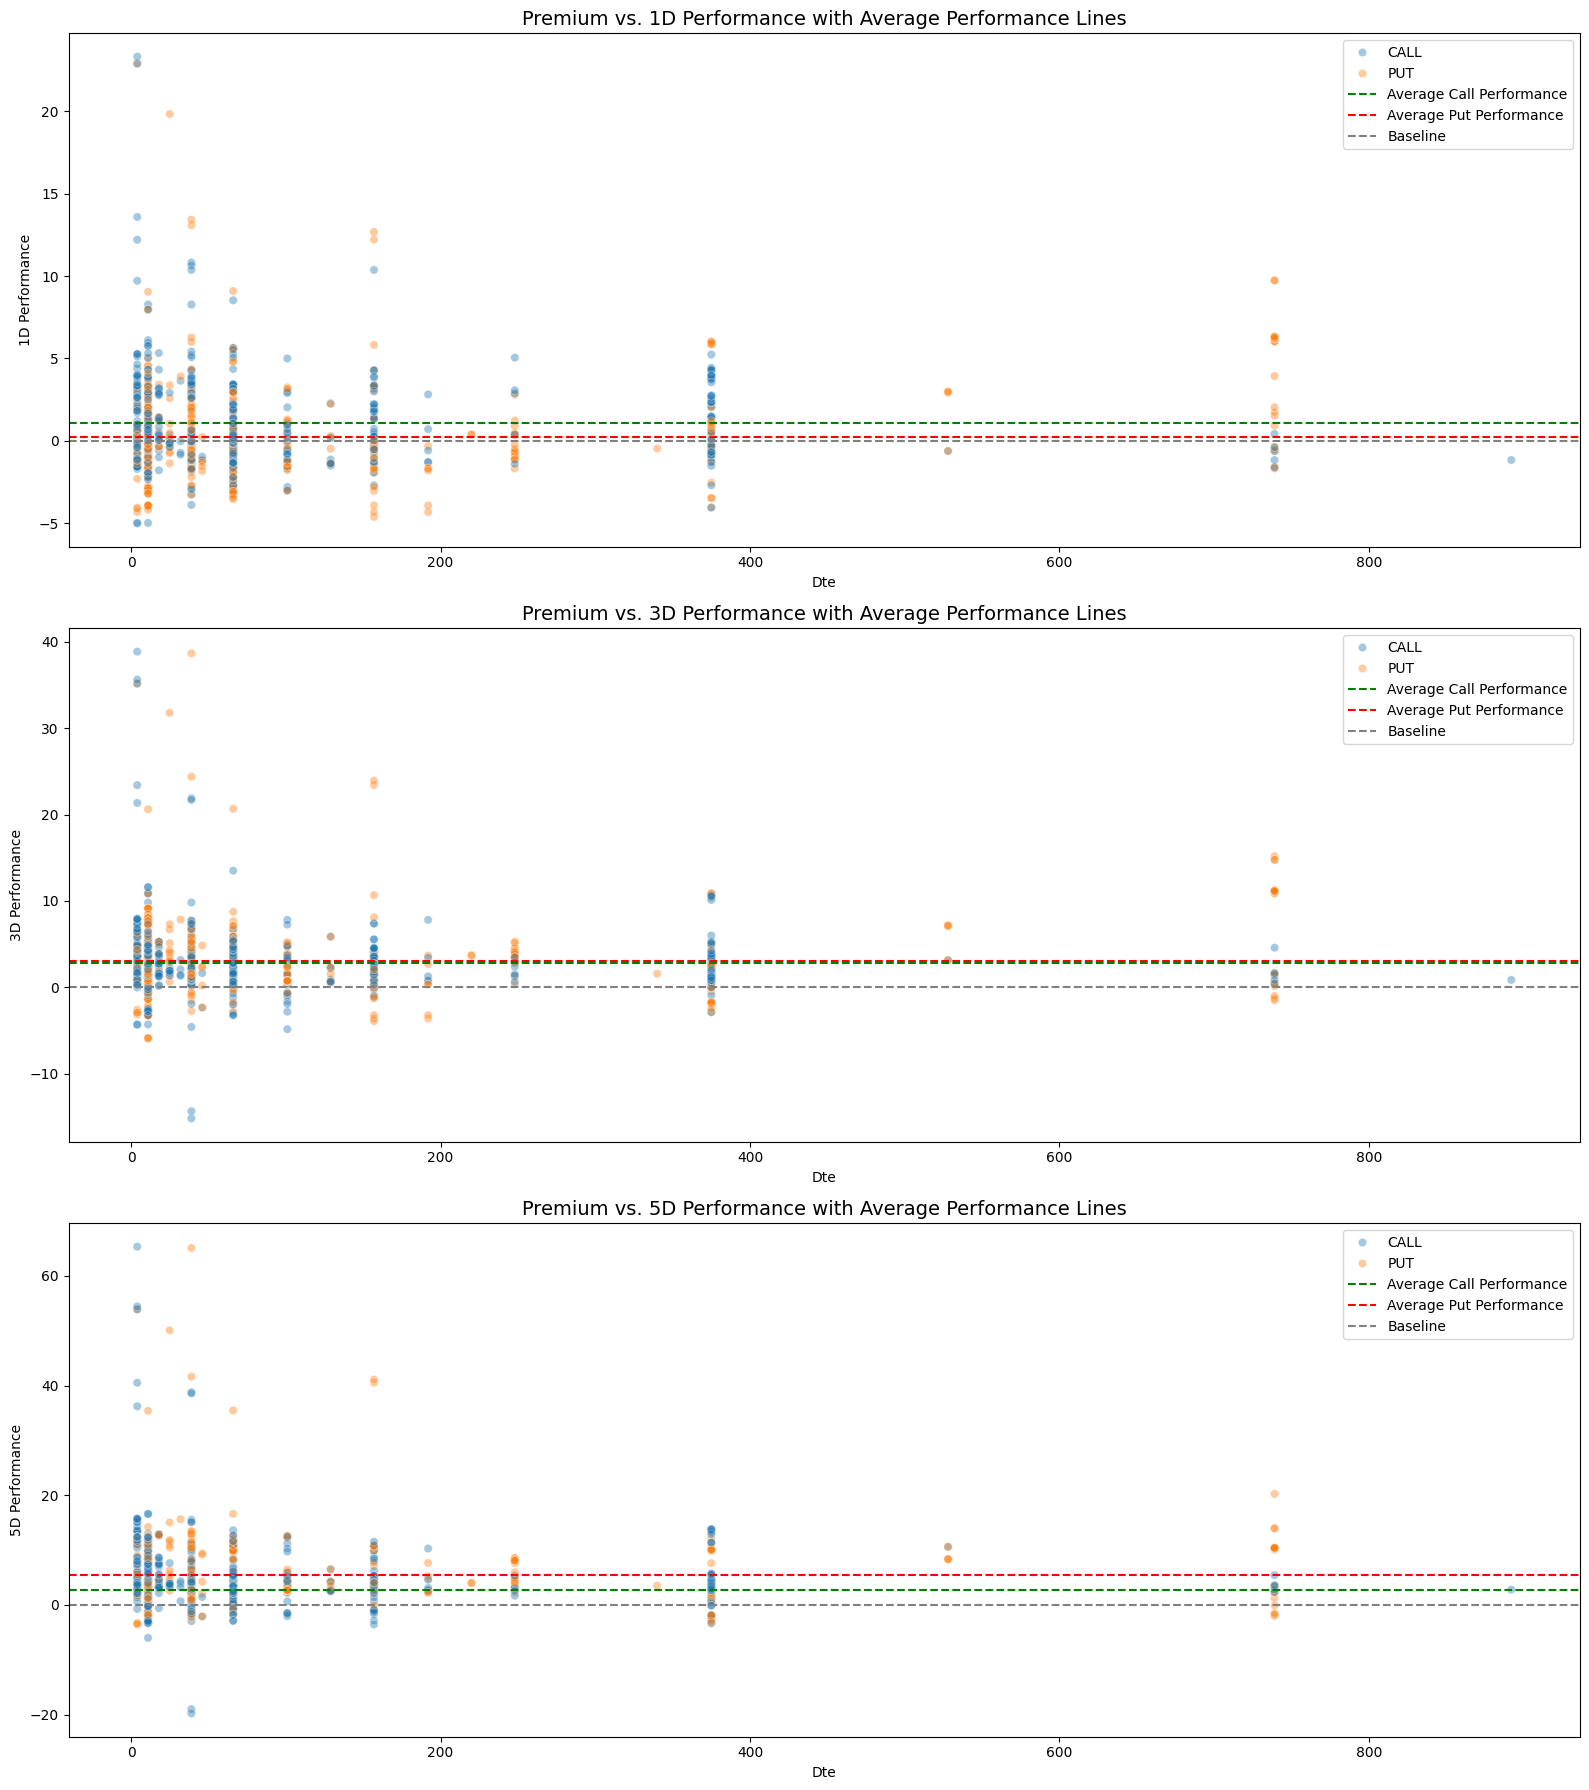

In [33]:
# Create scatterplots for Premium vs. Performance metrics
plt.figure(figsize=(16, 18))

# Scatterplot for 1D Performance
plt.subplot(3, 1, 1)
sns.scatterplot(data=sector_data, x='Dte', y='1D Performance', hue='CallPut', alpha=0.4)
plt.axhline(y=1.08, color='green', label='Average Call Performance', ls='--')
plt.axhline(y=0.22, color='red', label='Average Put Performance', ls='--')
plt.axhline(y=0, color='grey', label='Baseline', ls='--')
plt.legend()
plt.title('Premium vs. 1D Performance with Average Performance Lines', fontsize=14)

# Scatterplot for 3D Performance
plt.subplot(3, 1, 2)
sns.scatterplot(data=sector_data, x='Dte', y='3D Performance', hue='CallPut', alpha=0.4)
plt.axhline(y=2.79, color='green', label='Average Call Performance', ls='--')
plt.axhline(y=3.02, color='red', label='Average Put Performance', ls='--')
plt.axhline(y=0, color='grey', label='Baseline', ls='--')
plt.legend()
plt.title('Premium vs. 3D Performance with Average Performance Lines', fontsize=14)

# Scatterplot for 5D Performance
plt.subplot(3, 1, 3)
sns.scatterplot(data=sector_data, x='Dte', y='5D Performance', hue='CallPut', alpha=0.4)
plt.axhline(y=2.79, color='green', label='Average Call Performance', ls='--')
plt.axhline(y=5.51, color='red', label='Average Put Performance', ls='--')
plt.axhline(y=0, color='grey', label='Baseline', ls='--')
plt.legend()
plt.title('Premium vs. 5D Performance with Average Performance Lines', fontsize=14)

plt.tight_layout()
plt.show()




**Very long Dte Call and Put has opposite effect on 1D performance**


In [34]:
sector_data.groupby(['CallPut', 'Color'])['5D Performance'].mean()

CallPut  Color  
CALL     #FF0000    7.000000
         MAGENTA    8.809024
         WHITE      4.812517
         YELLOW     3.330448
PUT      #FF0000    8.786667
         MAGENTA    5.679000
         WHITE      5.216322
         YELLOW     6.011281
Name: 5D Performance, dtype: float64

### Modeling Approach A: Logistic Regression Model

This approach covers implementation of Logistic Regression.

In [35]:

# Define a custom function to assign values based on conditions
def assign_value(x):
    if x < 0:
        return 'negative'
    elif x > 0:
        return 'positive'
    else:
        return np.nan

# Apply the function to the specified columns
sector_data['1PN'] = sector_data['1D Performance'].apply(assign_value)
sector_data['3PN'] = sector_data['3D Performance'].apply(assign_value)
sector_data['5PN'] = sector_data['5D Performance'].apply(assign_value)

In [36]:
sector_data.columns

Index(['CreatedDate', 'CreatedTime', 'Symbol', 'Type', 'Volume', 'Price',
       'Side', 'Money', 'CallPut', 'Strike', 'Spot', 'Premium',
       'ExpirationDate', 'Color', 'ImpliedVolatility', 'Dte', 'ER', 'StockEtf',
       'Sector', 'Uoa', 'Weekly', 'MktCap', 'OI', '1D After', '3D After',
       '5D After', '1D Price', '3D Price', '5D Price', '1D Performance',
       '3D Performance', '5D Performance', 'Distance', '1PN', '3PN', '5PN'],
      dtype='object')

In [37]:
# Specify the list of column names you want to extract
columns_to_keep = ['Type', 'Volume', 'Price',
       'Side', 'Money', 'CallPut', 'Strike', 'Spot', 'Premium',
       'ExpirationDate', 'Color', 'ImpliedVolatility', 'Dte', 'ER', 'StockEtf',
       'Sector', 'Uoa', 'Weekly', 'MktCap', 'OI', '1D Performance',
       '3D Performance', '5D Performance', 'Distance','1PN', '3PN', '5PN']

# Extract the specified columns from the original dataset
necessary_data = sector_data[columns_to_keep]
necessary_data

# Or perform any other analysis on the extracted columns


,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D Performance,3D Performance,5D Performance,Distance,1PN,3PN,5PN
0,SWEEP,200,6.75,A,OTM,CALL,235.0,227.14,135000,2023-02-17,WHITE,0.33,39,F,STOCK,Information Technology,F,F,1676733000000,16193,0.75,5.01,5.82,3.46,positive,positive,positive
1,BLOCK,304,3.90,B,OTM,CALL,121.0,110.84,118560,2023-02-10,YELLOW,0.58,32,F,STOCK,Information Technology,F,F,291151000000,23,3.65,2.09,3.93,9.17,positive,positive,positive
2,BLOCK,250,8.46,B,ITM,CALL,150.0,156.19,211500,2023-01-13,MAGENTA,0.74,4,F,STOCK,Information Technology,F,T,365531000000,3918,1.86,5.71,13.34,-3.96,positive,positive,positive
3,SWEEP,500,14.85,B,ITM,CALL,100.0,110.92,742522,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,3.57,2.01,3.85,-9.84,positive,positive,positive
4,SWEEP,250,14.88,B,ITM,CALL,100.0,110.92,371961,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,3.57,2.01,3.85,-9.84,positive,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,BLOCK,1000,21.90,B,OTM,CALL,150.0,143.53,2190000,2024-01-19,YELLOW,0.39,375,F,STOCK,Information Technology,F,F,140510000000,755,2.72,4.23,3.44,4.51,positive,positive,positive
1299,ML/,999,6.15,B,OTM,CALL,145.0,130.70,614555,2023-06-16,WHITE,0.32,157,F,STOCK,Information Technology,F,F,2062010000000,13919,0.02,2.07,4.01,10.94,positive,positive,positive
1300,ML/,999,10.25,BB,ATM,PUT,130.0,130.70,1023805,2023-06-16,WHITE,0.33,157,F,STOCK,Information Technology,F,F,2062010000000,71667,0.02,2.07,4.01,-0.54,positive,positive,positive
1301,ML/,998,4.78,A,ITM,PUT,70.0,66.00,477041,2023-01-20,WHITE,0.49,11,F,STOCK,Information Technology,F,F,103126000000,61125,3.11,7.27,8.47,6.06,positive,positive,positive


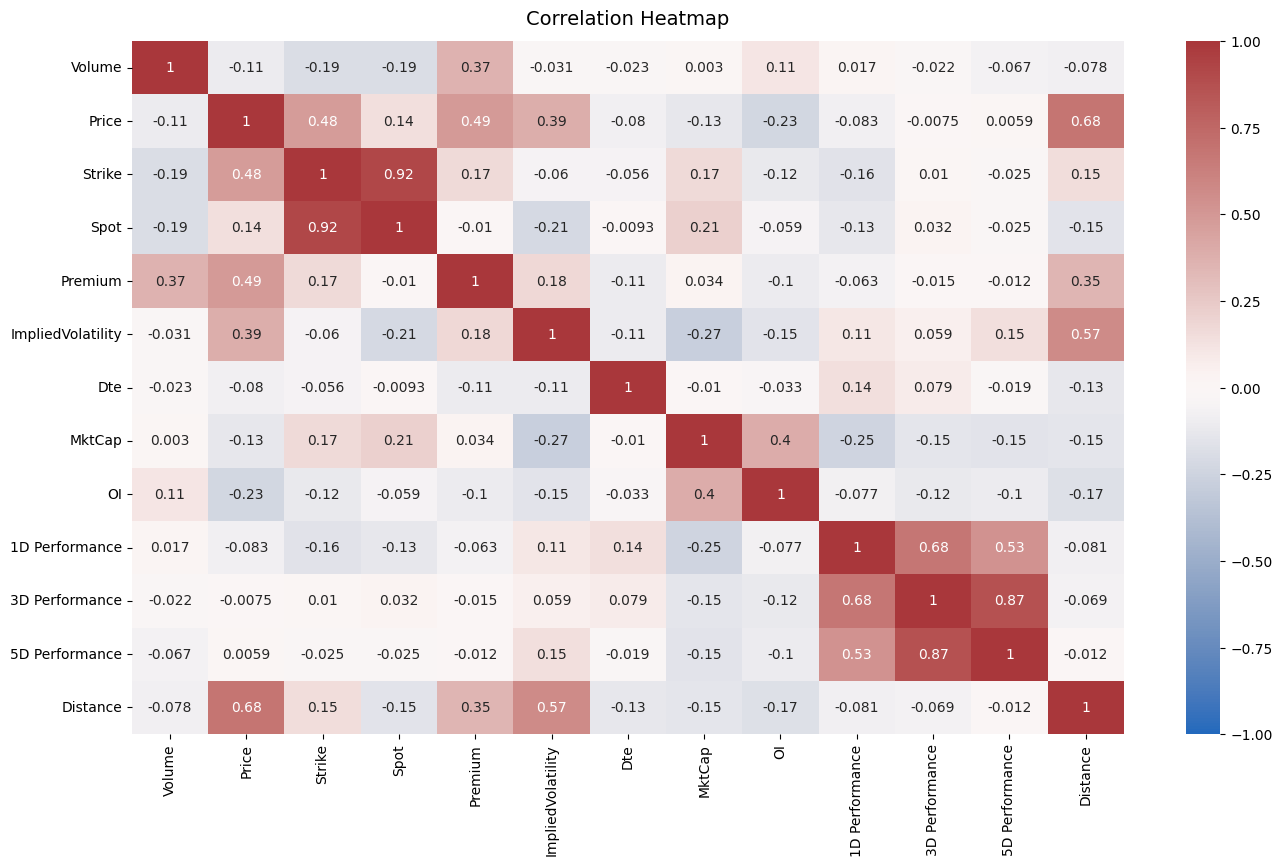

In [38]:
# Create a plot as needed 

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(necessary_data.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [39]:
largest_index = sector_data['Distance'].idxmax()
largest_row = sector_data.loc[largest_index]
print("Row with the largest value:")
print(largest_row)


Row with the largest value:
CreatedDate                      2023-01-09
CreatedTime                      2:33:10 PM
Symbol                                 DOCU
Type                                    ML/
Volume                                  290
Price                                 302.3
Side                                      B
Money                                   ITM
CallPut                                 PUT
Strike                                360.0
Spot                                  56.88
Premium                             8766700
ExpirationDate                   2023-01-20
Color                                 WHITE
ImpliedVolatility                       0.0
Dte                                      11
ER                                        F
StockEtf                              STOCK
Sector               Information Technology
Uoa                                       F
Weekly                                    F
MktCap                          10966000000
OI  

The meadian is:  2.18


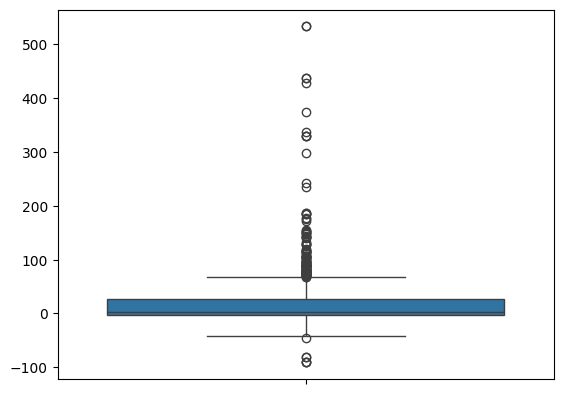

In [40]:
x = sector_data['Distance'].values

ax = sns.boxplot(x)

print('The meadian is: ', sector_data['Distance'].median())

In [44]:
import plotly.graph_objects as go

# Define hover text with only the Symbol column
hover_text = sector_data['Symbol']

# Define colors based on '5D Performance' values
colors = ['red' if p < 0 else 'green' for p in sector_data['5D Performance']]

# Create a trace for the scatter plot
trace = go.Scatter3d(
    x=sector_data['Distance'],
    y=sector_data['Dte'],
    z=sector_data['5D Performance'],
    mode='markers',
    marker=dict(
        size=5,
        color=colors,           # Set color based on '5D Performance' values
        opacity=0.6             # Marker opacity
    ),
    hovertext=hover_text       # Set hover text to show only Symbol
)

# Create layout for the plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Distance'),
        yaxis=dict(title='Dte'),
        zaxis=dict(title='Performance')
    ),
    title='3D Scatter Plot: Distance vs Dte vs Performance'
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the interactive plot
fig.show()


In [ ]:
# Create a filter for the desired stocks
desired_stocks = ['DOCU']  # Replace with the stocks you want to filter
# Filter the DataFrame based on the 'Symbol' column
filtered_df = sector_data[sector_data['Symbol'].isin(desired_stocks)]
filtered_df = filtered_df.reset_index(drop=True)

# Display the filtered DataFrame
filtered_df


,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance
0,2023-01-09,2:46:41 PM,DOCU,ML/,150,20.70,A,ITM,PUT,77.5,56.90,310500,2023-01-20,WHITE,0.99,11,F,STOCK,Information Technology,F,F,10966000000,372,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.02,3.16,4.96,36.20
1,2023-01-09,2:46:41 PM,DOCU,ML/,150,303.40,A,ITM,PUT,360.0,56.90,4551000,2023-01-20,MAGENTA,4.91,11,F,STOCK,Information Technology,F,F,10966000000,400,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.02,3.16,4.96,532.69
2,2023-01-09,2:46:41 PM,DOCU,ML/,230,243.12,A,ITM,PUT,300.0,56.90,5591750,2023-01-20,YELLOW,4.08,11,F,STOCK,Information Technology,F,F,10966000000,206,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.02,3.16,4.96,427.24
3,2023-01-09,2:46:41 PM,DOCU,ML/,230,23.25,A,ITM,PUT,80.0,56.90,534750,2023-01-20,WHITE,1.13,11,F,STOCK,Information Technology,F,F,10966000000,328,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.02,3.16,4.96,40.60
4,2023-01-09,2:37:44 PM,DOCU,ML/,500,43.05,B,ITM,PUT,100.0,56.88,2152500,2023-01-20,YELLOW,1.21,11,F,STOCK,Information Technology,F,F,10966000000,438,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,75.81
5,2023-01-09,2:37:44 PM,DOCU,ML/,1060,53.18,A,ITM,PUT,110.0,56.88,5637300,2023-01-20,WHITE,1.81,11,F,STOCK,Information Technology,F,F,10966000000,2131,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,93.39
6,2023-01-09,2:37:44 PM,DOCU,ML/,560,133.30,A,ITM,PUT,190.0,56.88,7464800,2023-01-20,YELLOW,3.27,11,F,STOCK,Information Technology,F,F,10966000000,500,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,234.04
7,2023-01-09,2:33:10 PM,DOCU,ML/,470,213.67,A,ITM,PUT,270.0,56.88,10042700,2024-01-19,YELLOW,1.30,375,F,STOCK,Information Technology,F,F,10966000000,425,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,374.68
8,2023-01-09,2:33:10 PM,DOCU,ML/,760,53.15,A,ITM,PUT,110.0,56.88,4039400,2023-01-20,WHITE,1.75,11,F,STOCK,Information Technology,F,F,10966000000,2131,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,93.39
9,2023-01-09,2:33:10 PM,DOCU,ML/,290,302.30,B,ITM,PUT,360.0,56.88,8766700,2023-01-20,WHITE,0.00,11,F,STOCK,Information Technology,F,F,10966000000,400,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,532.91


### Modeling Approach A: Logistic Regression Model

This approach covers implementation of Logistic Regression.

In [ ]:
# Get numbers of people who left vs. stayed
print(necessary_data['5PN'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(necessary_data['5PN'].value_counts(normalize=True))



positive    1192
negative     111
Name: 5PN, dtype: int64

positive    0.914812
negative    0.085188
Name: 5PN, dtype: float64


In [ ]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
result = necessary_data.groupby(['5PN'])['Premium'].agg([np.mean,np.median])

# Remove scientific notation and display as whole numbers
result['mean'] = result['mean'].map('{:.0f}'.format)
result['median'] = result['median'].map('{:.0f}'.format)

# Display the result
print(result)


             mean  median
5PN                      
negative   730173  371400
positive  1412564  350704


In [ ]:
import plotly.graph_objects as go

# Create a cross-tabulation of Color and 5PN
cross_tab = pd.crosstab(necessary_data['Color'], necessary_data['5PN'])

# Define colors for the bars
colors = ['#FF5733', '#28A745']  # Purple for 0 (not left), Red for 1 (left)

# Create traces for each category
traces = []
for i, (column, color) in enumerate(zip(cross_tab.columns, colors)):
    trace = go.Bar(
        x=cross_tab.index,
        y=cross_tab[column],
        name=str(column) + " (Left)",
        marker=dict(color=color),
        offsetgroup=i,  # Separate bars for each category
    )
    traces.append(trace)

# Define layout for the plot
layout = go.Layout(
    title='Counts of performance positive vs negative across xxx',
    xaxis=dict(title='Colors'),
    yaxis=dict(title='Performance count'),
    barmode='group',  # Cluster bars instead of stacking
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the interactive plot
fig.show()


In [ ]:
necessary_data['Color'].value_counts()

WHITE      876
YELLOW     270
MAGENTA    151
#FF0000      6
Name: Color, dtype: int64

## Unusual Flows

In [ ]:
# Count the occurrences of each stock symbol
symbol_counts = sector_data['Symbol'].value_counts()

# Filter symbols that appear 5 times or less
unusal_flow = symbol_counts[symbol_counts <= 3].index

# Filter the DataFrame based on the desired symbols
unusal_flow_list = sector_data[sector_data['Symbol'].isin(unusal_flow)]

# Reset the index
unusal_flow_list = unusal_flow_list.reset_index(drop=True)

# Display the filtered DataFrame
unusal_flow_list


# we can do it unusual calls and puts 

,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance
0,2023-01-09,3:56:17 PM,OLED,ML/,200,7.20,A,ITM,CALL,110.0,115.53,144000,2023-01-20,WHITE,0.48,11,F,STOCK,Information Technology,F,F,5282000000,255,2023-01-10,2023-01-12,2023-01-16,125.08,126.87,127.04,8.27,9.82,9.96,-4.79
1,2023-01-09,3:56:17 PM,OLED,ML/,200,9.90,B,ITM,CALL,110.0,115.53,198040,2023-02-17,YELLOW,0.45,39,F,STOCK,Information Technology,F,F,5282000000,11,2023-01-10,2023-01-12,2023-01-16,125.08,126.87,127.04,8.27,9.82,9.96,-4.79
2,2023-01-09,3:52:53 PM,MSTR,ML/,188,5.94,A,OTM,PUT,160.0,174.24,111672,2023-01-20,WHITE,1.02,11,F,STOCK,Information Technology,F,F,1813000000,847,2023-01-10,2023-01-12,2023-01-16,190.00,210.17,235.92,9.04,20.62,35.40,-8.18
3,2023-01-09,3:29:35 PM,ROK,SWEEP,164,16.09,A,ATM,PUT,270.0,271.57,263820,2023-04-21,YELLOW,0.31,101,F,STOCK,Information Technology,F,F,30722000000,27,2023-01-10,2023-01-12,2023-01-16,271.66,281.41,282.19,0.03,3.62,3.91,-0.58
4,2023-01-09,3:16:30 PM,BILL,SWEEP,196,9.29,A,OTM,PUT,95.0,100.67,182117,2023-02-17,WHITE,0.95,39,F,STOCK,Information Technology,F,F,9984000000,240,2023-01-10,2023-01-12,2023-01-16,101.65,104.31,106.55,0.97,3.62,5.84,-5.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2023-01-09,9:56:48 AM,MRVL,SWEEP,1000,1.28,A,OTM,CALL,45.0,37.83,128000,2023-03-17,WHITE,0.54,66,F,STOCK,Information Technology,F,F,30800000000,6347,2023-01-10,2023-01-12,2023-01-16,37.01,39.31,41.03,-2.18,3.90,8.45,18.94
65,2023-01-09,9:56:26 AM,KLAC,SWEEP,136,9.30,A,OTM,CALL,470.0,411.92,126475,2023-03-17,YELLOW,0.39,66,F,STOCK,Information Technology,F,F,56346000000,70,2023-01-10,2023-01-12,2023-01-16,416.27,419.07,415.95,1.06,1.74,0.98,14.10
66,2023-01-09,9:55:43 AM,IRM,SWEEP,200,5.60,BB,ITM,PUT,55.0,50.96,111981,2023-04-21,YELLOW,0.27,101,F,STOCK,Information Technology,F,F,14736000000,57,2023-01-10,2023-01-12,2023-01-16,50.16,52.15,52.32,-1.57,2.34,2.67,7.93
67,2023-01-09,9:45:53 AM,CLFD,BLOCK,265,10.00,A,ITM,CALL,95.0,97.34,265000,2023-02-17,YELLOW,0.69,39,F,STOCK,Information Technology,F,F,1328000000,18,2023-01-10,2023-01-12,2023-01-16,94.48,83.38,78.84,-2.94,-14.34,-19.01,-2.41


In [ ]:
unusal_flow_list['Symbol'].unique()

array(['OLED', 'MSTR', 'ROK', 'BILL', 'SWKS', 'AMKR', 'DDOG', 'RAMP',
       'OKTA', 'WK', 'FTNT', 'CSIQ', 'WDAY', 'HOOD', 'AMBA', 'STX',
       'KLAC', 'MDB', 'ENV', 'MBLY', 'APPS', 'TEAM', 'CSCO', 'MARA',
       'MELI', 'PI', 'EA', 'TTD', 'TWLO', 'TXN', 'FTDR', 'CARS', 'AEHR',
       'MRVL', 'ACN', 'VNET', 'IRM', 'CLFD'], dtype=object)

In [ ]:
# Group by 'CallPut', 'Money', and 'Side' and calculate the mean of '5D Performance'
mean_performance_by_group = unusal_flow_list.groupby(['CallPut', 'Money', 'Side'])['5D Performance'].mean().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(mean_performance_by_group, x='Side', y='5D Performance', color='Money', barmode='group',
             facet_row='CallPut', title='Mean 5D Performance by CallPut, Money, and Side')

# Show the plot
fig.show()

In [ ]:
unusal_flow_list.groupby(['CallPut', 'Money'])['5D Performance'].mean()


CallPut  Money
CALL     ATM      9.156667
         ITM      7.989333
         OTM      3.567143
PUT      ATM      2.285000
         ITM      8.047500
         OTM      7.493684
Name: 5D Performance, dtype: float64

In [ ]:
sector_data.groupby(['CallPut', 'Money'])['5D Performance'].mean()


CallPut  Money
CALL     ATM      6.672338
         ITM      4.303900
         OTM      4.920291
PUT      ATM      5.804872
         ITM      5.044488
         OTM      6.412336
Name: 5D Performance, dtype: float64

**Comparing overall sector average performance with unsual flows average performance,
and unusual flow has higher performance. In order to avoid its seasonal performance, 
add more data from different dates and months to confirm the significanse of unusual flows**

## Individual Stock Searching

In [ ]:
# Create a filter for the desired stocks
desired_stocks = ['ACN']  # Replace with the stocks you want to filter

In [ ]:
# Create a filter for the desired stocks
desired_stocks = ['ACN']  # Replace with the stocks you want to filter
# Filter the DataFrame based on the 'Symbol' column
filtered_df = sector_data[sector_data['Symbol'].isin(desired_stocks)]
filtered_df = filtered_df.reset_index(drop=True)

# Display the filtered DataFrame
filtered_df


,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,5D Performance,Distance
0,2023-01-09,10:21:50 AM,ACN,BLOCK,155,10.2,N,ATM,CALL,275.0,274.39,158100,2023-02-17,WHITE,0.29,39,F,STOCK,Information Technology,F,F,177379000000,240,2023-01-10,2023-01-12,2023-01-16,274.929993,283.839996,284.88,3.82,0.22


* SWEEP B OTM PUT - DOWN NEXT DAYS / UP NEXT WEEKS / DOWN BELOW STRIKE PRICE BY EXPIRATION

* SWEEP A ITM PUT LONG EXPIRATION- UP NEXT DAY / UP TO STRIKE PRICE IN THREE MONTHS 
* BLOCK/SWEEP A ITM CALL - DOWN NEXT DAYS

* Block B OTM CALL 71 FFF OI6867 - write calls collect premium

* ML/   B OTM CALL 163 FFF OI25 - write calls 
* ML/   B ITM CALL 163 FFF OI1237 - Write calls 

**What are my assumptions?**
* Unusual flows - only few prints + premium above $250k + AA + reasonable DTE + No earnings + OTM 
* I want to get the average return of differnt Types, CallPuts, Color, 

In [ ]:
average_performance_by_type = sector_data.groupby('Type')['5D Performance'].mean()
average_performance_by_type

Type
BLOCK    5.322782
ML/      4.928240
SWEEP    5.815570
Name: 5D Performance, dtype: float64

In [ ]:
callput_by_group = sector_data.groupby(['Type', 'CallPut'])['CallPut'].count()

callput_by_group

Type   CallPut
BLOCK  CALL       138
       PUT        146
ML/    CALL       195
       PUT        447
SWEEP  CALL       219
       PUT        158
Name: CallPut, dtype: int64

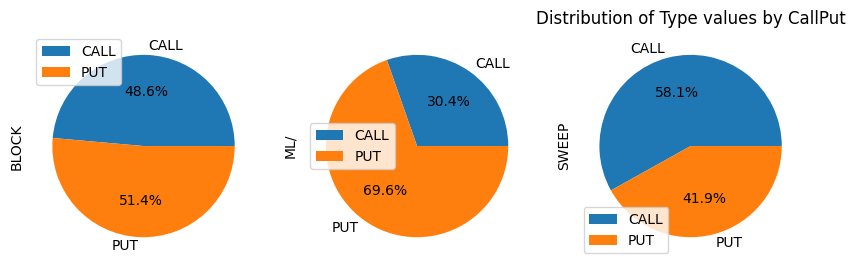

In [ ]:
callput_by_group = sector_data.groupby(['CallPut', 'Type'])['Type'].count()

# Plotting the pie chart
callput_by_group.unstack().plot(kind='pie', subplots=True, figsize=(10, 6), autopct='%1.1f%%')

# Adding title
plt.title('Distribution of Type values by CallPut')

# Display the plot
plt.show()


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# Define the range for 'Premium' to consider as non-outliers
premium_min = sector_data['Premium'].quantile(0.05)  # Adjust as needed
premium_max = sector_data['Premium'].quantile(0.95)  # Adjust as needed

# Filter out outliers based on 'Premium'
filtered_sector_data = sector_data[(sector_data['Premium'] >= premium_min) & (sector_data['Premium'] <= premium_max)]

fig = px.scatter(filtered_sector_data, 
                 x='5D Performance', 
                 y='Premium', 
                 color='Premium', 
                 size='Premium', 
                 hover_data=['Dte'])

fig.add_hline(y=0, line_dash="dot", line_color="grey")  # Add horizontal line at y=0

fig.update_layout(plot_bgcolor="white")
fig.show()


In [ ]:
# Assuming required_data is your DataFrame
call_data = sector_data[sector_data['CallPut'] == 'CALL'].reset_index(drop=True)
put_data = sector_data[sector_data['CallPut'] == 'PUT'].reset_index(drop=True)


what percentage of the call is above 0 and below 0 
how about call + aa + short time 

Feature engineering:
* OTM/ATM/ITM
* Premium 
* Expiration time 

